### import

In [19]:
import pandas as pd
import numpy as np
import os
import autogluon.eda.auto as auto
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

import analysis

### data

In [3]:
load = analysis.file_load("kaggle competitions download -c playground-series-s4e7")

In [4]:
df_train, df_test, df_submission = load.load_tr_tst_sub_data()

100%|██████████| 247M/247M [00:08<00:00, 31.6MB/s] 



Archive:  playground-series-s4e7.zip
  inflating: ./data/sample_submission.csv  
  inflating: ./data/test.csv         
  inflating: ./data/train.csv        


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11504798 entries, 0 to 11504797
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Gender                object 
 2   Age                   int64  
 3   Driving_License       int64  
 4   Region_Code           float64
 5   Previously_Insured    int64  
 6   Vehicle_Age           object 
 7   Vehicle_Damage        object 
 8   Annual_Premium        float64
 9   Policy_Sales_Channel  float64
 10  Vintage               int64  
 11  Response              int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 1.0+ GB


In [6]:
# sorted(df_train.Policy_Sales_Channel.unique())
# sum([i%1 != 0 for i in sorted(df_train.Policy_Sales_Channel.unique())])  ## 1~163 integer, 152 unique values
# sorted(df_train.Vintage.unique())  ## 10~299 integer, dosen't have broken. need to normalization(maybe).
df_train.Region_Code.unique()  ## region code. object values... not float... 근데 어차피 트리 돌릴거면 더미화 안해도 될 것 같긴 한데, 그리고 39.2는 39로 바꿔야 할듯, and convert integer

array([35. , 28. , 14. ,  1. , 15. , 47. , 45. ,  8. , 11. ,  3. , 10. ,
       12. , 37. , 50. , 30. , 46. , 29. , 16. , 26. , 25. , 41. , 48. ,
        7. ,  4. , 24. , 36. , 33. ,  2. ,  9. , 27. , 18. , 43. , 49. ,
       17. , 13. , 38. ,  6. , 21. , 23. ,  0. , 19. ,  5. , 39. , 44. ,
       20. , 40. , 22. , 32. , 42. , 31. , 34. , 51. , 52. , 39.2])

In [7]:
df_train.nunique()

id                      11504798
Gender                         2
Age                           66
Driving_License                2
Region_Code                   54
Previously_Insured             2
Vehicle_Age                    3
Vehicle_Damage                 2
Annual_Premium             51728
Policy_Sales_Channel         152
Vintage                      290
Response                       2
dtype: int64

In [8]:
df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### Feature Engineering

In [9]:
df_train.assign(Region_Code = df_train.Region_Code.astype("int"))

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15,1,1-2 Year,No,31951.0,152.0,294,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11504793,11504793,Male,48,1,6,0,1-2 Year,Yes,27412.0,26.0,218,0
11504794,11504794,Female,26,1,36,0,< 1 Year,Yes,29509.0,152.0,115,1
11504795,11504795,Female,29,1,32,1,< 1 Year,No,2630.0,152.0,189,0
11504796,11504796,Female,51,1,28,0,1-2 Year,Yes,48443.0,26.0,274,1


No path specified. Models will be saved in: "AutogluonModels/ag-20240715_064142/"


### Model Prediction for Response

Using validation data for `Test` points

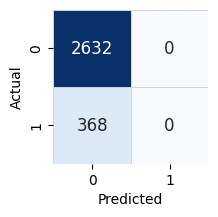

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.877333,0.877143,0.002935,0.008797,1.765775,0.002935,0.008797,1.765775,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
id,0.0,0.0,0.5,5,0.0,0.0
Gender,0.0,0.0,0.5,5,0.0,0.0
Age,0.0,0.0,0.5,5,0.0,0.0
Driving_License,0.0,0.0,0.5,5,0.0,0.0
Region_Code,0.0,0.0,0.5,5,0.0,0.0
Previously_Insured,0.0,0.0,0.5,5,0.0,0.0
Vehicle_Age,0.0,0.0,0.5,5,0.0,0.0
Vehicle_Damage,0.0,0.0,0.5,5,0.0,0.0
Annual_Premium,0.0,0.0,0.5,5,0.0,0.0
Policy_Sales_Channel,0.0,0.0,0.5,5,0.0,0.0


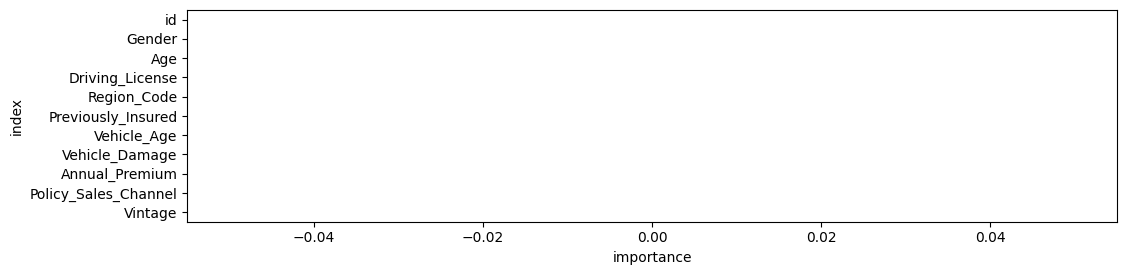

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,0,1,error
2589800,2589800,Male,53,1,28.0,1,1-2 Year,No,36586.0,26.0,239,1,0.883155,0.116845,0.766310
3281769,3281769,Male,31,1,28.0,0,< 1 Year,Yes,49555.0,124.0,62,1,0.881434,0.118566,0.762868
9877577,9877577,Male,24,1,3.0,0,< 1 Year,Yes,39272.0,152.0,73,1,0.881434,0.118566,0.762868
6508245,6508245,Male,32,1,28.0,0,< 1 Year,Yes,43309.0,124.0,68,1,0.881434,0.118566,0.762868
10468228,10468228,Female,23,1,29.0,0,< 1 Year,Yes,29824.0,152.0,39,1,0.881226,0.118774,0.762452
10767373,10767373,Female,24,1,37.0,0,< 1 Year,Yes,34979.0,152.0,298,1,0.881226,0.118774,0.762452
10471609,10471609,Female,23,1,28.0,0,< 1 Year,Yes,38234.0,152.0,79,1,0.881226,0.118774,0.762452
10595917,10595917,Female,32,1,20.0,0,< 1 Year,Yes,2630.0,26.0,257,1,0.881226,0.118774,0.762452
8892823,8892823,Male,27,1,28.0,0,< 1 Year,No,44970.0,152.0,215,1,0.880973,0.119027,0.761947
1406387,1406387,Female,27,1,34.0,0,< 1 Year,No,24117.0,152.0,44,1,0.880973,0.119027,0.761947


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,0,1,error
6894263,6894263,Male,45,1,41.0,0,1-2 Year,Yes,32319.0,12.0,45,1,0.855103,0.144897,0.710205
11137587,11137587,Male,46,1,29.0,0,1-2 Year,Yes,29472.0,124.0,128,1,0.855103,0.144897,0.710205
5899727,5899727,Male,54,1,3.0,0,1-2 Year,Yes,30503.0,124.0,122,1,0.855103,0.144897,0.710205
2200885,2200885,Male,53,1,28.0,0,> 2 Years,Yes,50487.0,26.0,94,1,0.860757,0.139243,0.721514
8526266,8526266,Male,50,1,28.0,0,> 2 Years,Yes,47139.0,26.0,54,1,0.860757,0.139243,0.721514
5970236,5970236,Male,50,1,28.0,0,> 2 Years,Yes,48322.0,26.0,158,1,0.860757,0.139243,0.721514
3439135,3439135,Male,51,1,28.0,0,> 2 Years,Yes,52493.0,26.0,118,1,0.860757,0.139243,0.721514
3440015,3440015,Male,43,1,28.0,0,> 2 Years,Yes,46860.0,26.0,57,1,0.860757,0.139243,0.721514
1282309,1282309,Female,53,1,28.0,0,> 2 Years,Yes,59932.0,26.0,131,1,0.860757,0.139243,0.721514
10128094,10128094,Male,47,1,28.0,0,1-2 Year,Yes,30449.0,124.0,181,1,0.865254,0.134746,0.730508


In [20]:
auto.quick_fit(
    train_data = df_train,
    label = "Response",
    test_data = df_test,
    show_feature_importance_barplots = True
)

## Target variable analysis

### Label Insights

 - Moderate minority class imbalance detected - imbalance ratio is `14.00%`. Recommendations:
   - downsample majority class `0` to improve the balance
   - upweight downsampled class so that `sample_weight = original_weight x downsampling_factor`.[TabularPredictor](https://auto.gluon.ai/stable/api/autogluon.predictor.html#module-0) supports this via `sample_weight` parameter

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
Response,10000,0.1228,0.328224,0.0,0.0,0.0,0.0,1.0,int64,2,,,int,


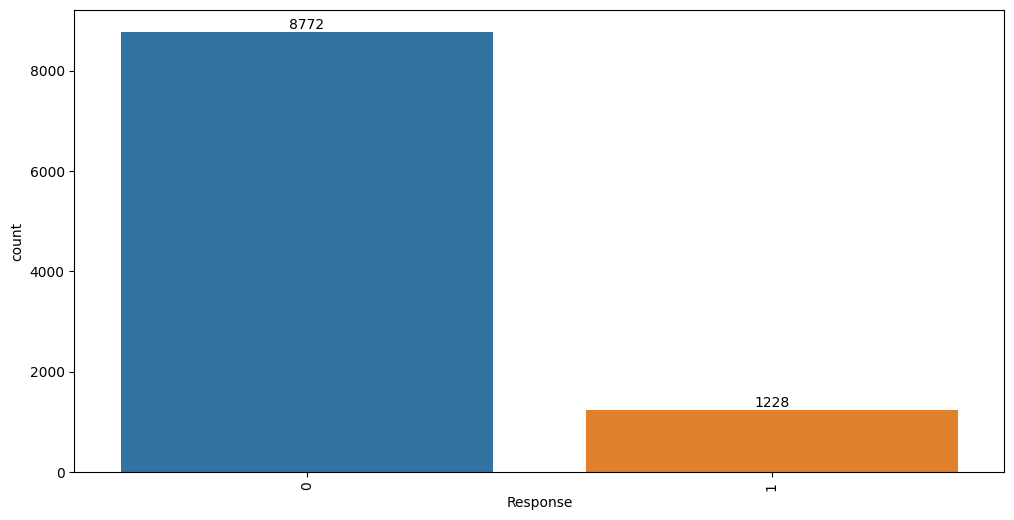

### Target variable correlations
 - ⚠️ no fields with absolute correlation greater than `0.5` found for target variable `Response`.

In [23]:
auto.target_analysis(
    train_data = df_train,
    label = "Response",
    problem_type = "binary"
)

오토글루온으로 돌리기에는 손색이 있는듯, 그리고 모델링이 제대로 안된 것 같은데?